# Face Detection from Image Arrays – Extract facial features by slicing a NumPy-based image array.

In [9]:
from google.colab import files
uploaded = files.upload()

Saving image.jpeg to image (1).jpeg


Face Region: 


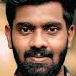

Eye Region: 


Eye Region: 


Detected Faces: 


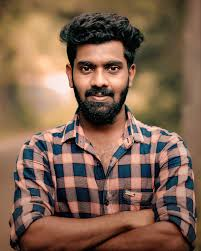

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load an image and convert it to a NumPy array
image = cv2.imread('image.jpeg')  # Replace with your image path
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load OpenCV's pre-trained Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +
'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.1,
minNeighbors=5)

# Loop through the detected faces and extract facial features (regions)
for (x, y, w, h) in faces:
    # Slice the image array to extract the face region
    face_region = image[y:y+h, x:x+w]

    # Optional: Display the face region
    print('Face Region: ')
    cv2_imshow(face_region)

    # Extract additional facial features if required (e.g., eyes, nose)
    eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +
'haarcascade_eye.xml')
    eyes = eyes_cascade.detectMultiScale(face_region, scaleFactor=1.1,
minNeighbors=5)

    for (ex, ey, ew, eh) in eyes:
        eye_region = face_region[ey:ey+eh, ex:ex+ew]
        print('Eye Region: ')
        cv2_imshow(eye_region)

# Show the original image with detected faces
print('Detected Faces: ')
cv2_imshow(image)

cv2.waitKey(0)
cv2.destroyAllWindows()